In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from ipywidgets import interact
import seaborn as sns

#plt.style.use('dark_background')
viridis = cm.get_cmap('viridis', 8)

In [2]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(500, 500)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(20, 20),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

In [3]:
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
#plot_examples([cmap])

In [4]:
def generate_perlin_noise_2d(shape, res = (1,1)):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3

    shape,res = np.array(shape), np.array(res)
    delta = res / shape
    d = shape // res
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:,1:].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1])) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0], grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)

In [5]:
noise = generate_perlin_noise_2d((500, 500))

<AxesSubplot:>

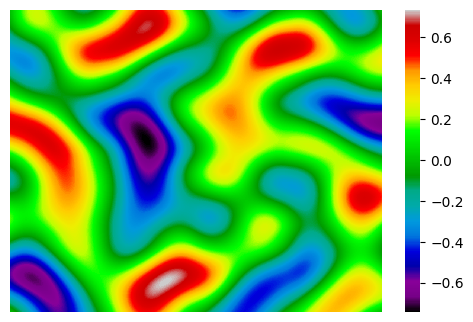

In [12]:
# fig, axs = plt.subplots(1, 1, figsize=(500, 500))n
# for a in axs:
# 	sns.heatmap(generate_perlin_noise_2d((500, 500)), ax=a, cmap="terrain")

fig, axs = plt.subplots(1, 1, dpi=100)
sns.heatmap(generate_perlin_noise_2d((1000, 1000), (4,4)), cmap="nipy_spectral", yticklabels=False, xticklabels=False)

In [17]:
@interact(x=(1, 20, 1))
def test(x):
	fig, axs = plt.subplots(1, 1, dpi=200)
	sns.heatmap(generate_perlin_noise_2d((100*x, 100*x), (x, x)), cmap="nipy_spectral", yticklabels=False, xticklabels=False)

interactive(children=(IntSlider(value=10, description='x', max=20, min=1), Output()), _dom_classes=('widget-in…